---
<div style="text-align: right"> Dazed & Confusion Matrix 2.0 <br> REQUIRED TO HAVE TENSORFLOW & TENSORFLOW-PROBABILITY INSTALLED </div>

--- 

# Load libriaries and functions.

In [1]:
# theano
import theano
print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)
# keras
from tensorflow import keras
print('keras: %s' % keras.__version__)
import tensorflow_probability as tfp
print('tf_probability: %s' % tfp.__version__)
import autokeras as ak
print('autokeras: %s' % ak.__version__)

theano: 1.0.4
tensorflow: 2.3.0
keras: 2.4.0
tf_probability: 0.11.0
autokeras: 1.0.12


In [2]:
import pandas as pd
import numpy as np
tfk = tf.keras
tf.keras.backend.set_floatx("float64")
import tensorflow_probability as tfp
tfd = tfp.distributions
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [3]:
import requests
import io

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Define helper functions

In [5]:
scaler = StandardScaler()

# Loading the Data

As sensors tend to drift due to aging, theretically, it is better to only use data from the past month six.

In [6]:
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Dazed-Confusion-Matrix/dev/data/TRAIN_911_DEMO_MERGED_ENCODED.CSV" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

train_data = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Downloading the csv file from your GitHub account

url_1 = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Dazed-Confusion-Matrix/dev/data/TEST_911_DEMO_MERGED_ENCODED.CSV" # Make sure the url is the raw version of the file on GitHub
download_1 = requests.get(url_1).content

# Reading the downloaded content and turning it into a pandas dataframe

test_data = pd.read_csv(io.StringIO(download_1.decode('utf-8')))


In [7]:
test_data['Priority_OUT_OF_SERVICE'] = test_data['Priority_OUT OF SERVICE']
test_data = test_data.drop(['Priority_OUT OF SERVICE'], axis=1)
train_data['Priority_OUT_OF_SERVICE'] = train_data['Priority_OUT OF SERVICE']
train_data = train_data.drop(['Priority_OUT OF SERVICE'], axis=1)

In [8]:
test_data.isnull().sum()

Description                 0
Post                        0
District                    0
Neighborhood                0
Longitude                   0
Latitude                    0
Premise                     0
CallDescription             0
Year                        0
median_household_income     0
households_below_poverty    0
perc18_24                   0
perc25_64                   0
perc65up                    0
perc_asian                  0
perc_aa                     0
perc_hisp                   0
perc_white                  0
median_price_homes_sold     0
racial_diversity_index      0
num_households              0
Month                       0
crime_hour                  0
Outside                     0
Weapon_FIREARM              0
Weapon_HANDS                0
Weapon_KNIFE                0
Weapon_NONE                 0
Weapon_OTHER                0
call_hour                   0
Season_autumn               0
Season_spring               0
Season_summer               0
Season_win

In [9]:
train_data.Description.unique()

array([ 8,  7,  3,  0,  5, 11,  4, 12,  1, 13,  2, 14,  9, 10,  6],
      dtype=int64)

In [10]:
train_data['Description'].value_counts()

7     1746
8     1382
5     1017
3      996
4      805
0      517
12     461
2       97
14      89
10      57
11      50
6       41
13      34
1       31
9       26
Name: Description, dtype: int64

In [11]:
#test_data['Description']=test_data["Description"].astype(np.float64)
#train_data['Description']=train_data["Description"].astype(np.float64)

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Description               1838 non-null   int64  
 1   Post                      1838 non-null   float64
 2   District                  1838 non-null   int64  
 3   Neighborhood              1838 non-null   int64  
 4   Longitude                 1838 non-null   float64
 5   Latitude                  1838 non-null   float64
 6   Premise                   1838 non-null   int64  
 7   CallDescription           1838 non-null   int64  
 8   Year                      1838 non-null   int64  
 9   median_household_income   1838 non-null   float64
 10  households_below_poverty  1838 non-null   float64
 11  perc18_24                 1838 non-null   float64
 12  perc25_64                 1838 non-null   float64
 13  perc65up                  1838 non-null   float64
 14  perc_asi

In [13]:
X_test = test_data.drop(['Description'], axis=1)
y_test = test_data["Description"]

In [14]:
X_train_full = train_data.drop(['Description'], axis=1)
y_train_full = train_data['Description']

In [15]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape, test_data.shape, train_data.shape)

(7349, 41) (1838, 41) (7349,) (1838,) (1838, 42) (7349, 42)


In [17]:
# Fit only to the training data
scaler.fit(X_train_full)

StandardScaler()

In [18]:
X_train_full = scaler.transform(X_train_full)
X_test = scaler.transform(X_test)

In [19]:
#The validation set contains 1935 units of information from the 7350, which is 26.33% of the data 
X_valid, X_train = X_train_full[:1934], X_train_full[1934:]
y_valid, y_train = y_train_full[:1934], y_train_full[1934:]

In [86]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
ANN_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[41]),  
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(15, activation="softmax")
])

In [88]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 41)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1260      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
Total params: 2,195
Trainable params: 2,195
Non-trainable params: 0
_________________________________________________________________


In [89]:
ANN_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [90]:
#Set the epich to 150 because when testing different epochs this was the point before validation loss became eratic
ANN_history = ANN_model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))


Epoch 1/50
170/170 [==============================] - 0s 1ms/step - loss: 2.4236 - accuracy: 0.2161 - val_loss: 2.1177 - val_accuracy: 0.3154
Epoch 2/50
170/170 [==============================] - 0s 830us/step - loss: 1.8957 - accuracy: 0.3662 - val_loss: 1.7267 - val_accuracy: 0.4012
Epoch 3/50
170/170 [==============================] - 0s 676us/step - loss: 1.5738 - accuracy: 0.4720 - val_loss: 1.4653 - val_accuracy: 0.5109
Epoch 4/50
170/170 [==============================] - 0s 753us/step - loss: 1.3631 - accuracy: 0.5638 - val_loss: 1.2984 - val_accuracy: 0.5812
Epoch 5/50
170/170 [==============================] - 0s 671us/step - loss: 1.2253 - accuracy: 0.6260 - val_loss: 1.1821 - val_accuracy: 0.6339
Epoch 6/50
170/170 [==============================] - 0s 763us/step - loss: 1.1284 - accuracy: 0.6567 - val_loss: 1.1026 - val_accuracy: 0.6618
Epoch 7/50
170/170 [==============================] - 0s 694us/step - loss: 1.0609 - accuracy: 0.6770 - val_loss: 1.0501 - val_accuracy: 0

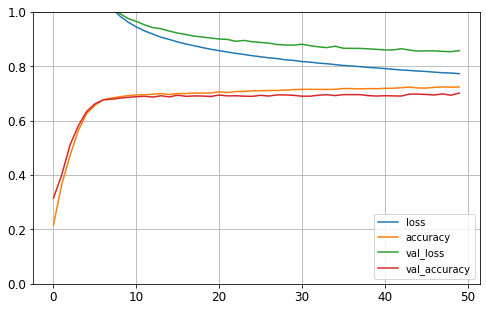

In [91]:
pd.DataFrame(ANN_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [92]:
ANN_model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 397us/step - loss: 0.8419 - accuracy: 0.7100


[0.8419079299979682, 0.7100108813928183]

In [93]:
X_new = X_test[:10]
y_proba = ANN_model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.03, 0.05, 0.88, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0.  , 0.83, 0.08, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.01, 0.01, 0.2 , 0.  , 0.  , 0.59, 0.16, 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.  , 0.  , 0.93, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.94, 0.02, 0.  , 0.  , 0.01, 0.02, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.11, 0.  , 0.  , 0.82, 0.05, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.06, 0.12, 0.64, 0.  , 0.  , 0.1 , 0.02, 0.  , 0.  ,
        0.03, 0.01, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.01, 0.  , 0.  , 0.3 , 0.65, 0.  , 0.  ,
        0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.02, 0.13, 0.  , 0.  , 0.77, 0.05, 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.01, 0.01, 0.  ,

In [94]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(ANN_model.predict(X_new), axis=-1)
y_pred

array([4, 7, 7, 5, 3, 7, 4, 8, 7, 5], dtype=int64)

In [95]:
y_new = y_test[:10]
y_new

0    4
1    7
2    7
3    5
4    3
5    7
6    4
7    7
8    7
9    5
Name: Description, dtype: int64

# Trying it under autokeras

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
input_node = ak.StructuredDataInput()
output_node = ak.StructuredDataBlock(categorical_encoding=False)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=15
)
clf.fit(X_train, y_train, epochs=10)

Trial 15 Complete [00h 00m 06s]
val_loss: 0.8834274134766013

Best val_loss So Far: 0.877049161147533
Total elapsed time: 00h 01m 21s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
170/170 [==============================] - 0s 3ms/step - loss: 1.3802 - accuracy: 0.5638
Epoch 2/10
170/170 [==============================] - 0s 2ms/step - loss: 1.0065 - accuracy: 0.6691
Epoch 3/10
170/170 [==============================] - 0s 3ms/step - loss: 0.9490 - accuracy: 0.6868
Epoch 4/10
170/170 [==============================] - 0s 3ms/step - loss: 0.9094 - accuracy: 0.6999
Epoch 5/10
170/170 [==============================] - 0s 3ms/step - loss: 0.8991 - accuracy: 0.6933
Epoch 6/10
170/170 [==============================] - 0s 3ms/step - loss: 0.8774 - accuracy: 0.6994
Epoch 7/10
170/170 [==============================] - 0s 3ms/step - loss: 0.8667 - accuracy: 0.7012
Epoch 8/10
170/170 [==============================] - 0s 3ms/step - loss: 0.8460 - accuracy: 0.7108
Epoch 9/10
170/170 [========

In [29]:
test_loss, test_acc = clf.evaluate(X_test, y_test, verbose=0)

In [30]:
print('Test accuracy: ', test_acc)
print('Test loss: ', test_loss)

Test accuracy:  0.721436343852013
Test loss:  0.8000593592085439


In [31]:
model = clf.export_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 41)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               21504     
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [116]:
Auto_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[41]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation="softmax")
])

In [117]:
Auto_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               21504     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 15)                1935      
Total params: 89,103
Trainable params: 89,103
Non-trainable params: 0
_________________________________________________________________


In [119]:
Auto_model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'sgd',
              metrics=["accuracy"])

In [120]:
Auto_history = Auto_model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
170/170 [==============================] - 0s 3ms/step - loss: 2.0651 - accuracy: 0.3317 - val_loss: 1.5103 - val_accuracy: 0.5946
Epoch 2/50
170/170 [==============================] - 0s 2ms/step - loss: 1.3729 - accuracy: 0.5795 - val_loss: 1.1569 - val_accuracy: 0.6598
Epoch 3/50
170/170 [==============================] - 0s 2ms/step - loss: 1.1492 - accuracy: 0.6428 - val_loss: 1.0421 - val_accuracy: 0.6794
Epoch 4/50
170/170 [==============================] - 0s 2ms/step - loss: 1.0646 - accuracy: 0.6591 - val_loss: 0.9912 - val_accuracy: 0.6774
Epoch 5/50
170/170 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.6704 - val_loss: 0.9554 - val_accuracy: 0.6846
Epoch 6/50
170/170 [==============================] - 0s 2ms/step - loss: 0.9818 - accuracy: 0.6790 - val_loss: 0.9337 - val_accuracy: 0.6892
Epoch 7/50
170/170 [==============================] - 0s 2ms/step - loss: 0.9481 - accuracy: 0.6846 - val_loss: 0.9172 - val_accuracy: 0.6929
Epoch 

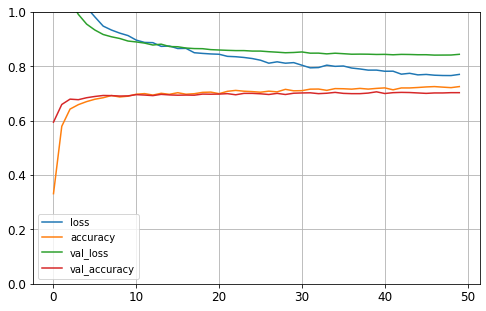

In [121]:
pd.DataFrame(Auto_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [122]:
Auto_model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 1ms/step - loss: 0.8098 - accuracy: 0.7122


[0.8097818004812587, 0.7121871599564744]

In [113]:
X_new = X_test[:10]
y_proba = Auto_model.predict(X_new)

In [114]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(Auto_model.predict(X_new), axis=-1)
y_pred

array([4, 7, 7, 5, 3, 7, 4, 8, 7, 5], dtype=int64)

In [115]:
y_new = y_test[:10]
y_new

0    4
1    7
2    7
3    5
4    3
5    7
6    4
7    7
8    7
9    5
Name: Description, dtype: int64

# Trying to improve for accuracy with custom activation fucntion

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Custom Activation Function
--- 

In [124]:
from keras import backend as K

def my_swish(z, beta=1.0):
    return z * tf.math.sigmoid(beta * z)

In [125]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'my_swish': Activation(my_swish)})

In [128]:
swish_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[41]),
    keras.layers.Dense(512, activation="my_swish"),
    keras.layers.Dropout(0.42),
    keras.layers.Dense(128, activation="my_swish"),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(15, activation="softmax")
])

In [129]:
swish_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               21504     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                1935      
Total params: 89,103
Trainable params: 89,103
Non-trainable params: 0
_________________________________________________________________


In [130]:
swish_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [131]:
#Set the epich to 150 because when testing different epochs this was the point before validation loss became eratic
swish_history = swish_model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
170/170 [==============================] - 0s 3ms/step - loss: 2.3773 - accuracy: 0.3453 - val_loss: 2.0323 - val_accuracy: 0.5326
Epoch 2/50
170/170 [==============================] - 0s 2ms/step - loss: 1.7538 - accuracy: 0.5564 - val_loss: 1.5034 - val_accuracy: 0.6044
Epoch 3/50
170/170 [==============================] - 0s 2ms/step - loss: 1.3583 - accuracy: 0.6299 - val_loss: 1.2269 - val_accuracy: 0.6556
Epoch 4/50
170/170 [==============================] - 0s 3ms/step - loss: 1.1598 - accuracy: 0.6571 - val_loss: 1.0947 - val_accuracy: 0.6686
Epoch 5/50
170/170 [==============================] - 0s 2ms/step - loss: 1.0666 - accuracy: 0.6757 - val_loss: 1.0297 - val_accuracy: 0.6799
Epoch 6/50
170/170 [==============================] - 0s 2ms/step - loss: 1.0146 - accuracy: 0.6759 - val_loss: 0.9922 - val_accuracy: 0.6805
Epoch 7/50
170/170 [==============================] - 0s 2ms/step - loss: 0.9771 - accuracy: 0.6838 - val_loss: 0.9685 - val_accuracy: 0.6903
Epoch 

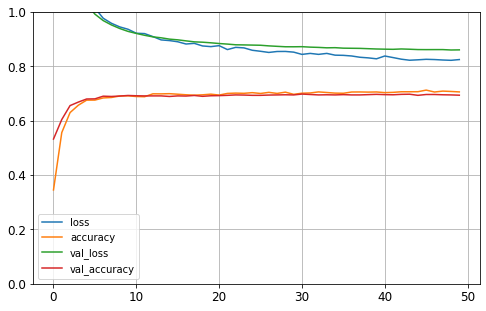

In [132]:
pd.DataFrame(swish_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [133]:
swish_model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 948us/step - loss: 0.8183 - accuracy: 0.7138


[0.8182927177442689, 0.7138193688792165]

In [134]:
X_new = X_test[:10]
y_proba = swish_model.predict(X_new)

In [135]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(swish_model.predict(X_new), axis=-1)
y_pred

array([4, 7, 7, 5, 3, 7, 4, 8, 7, 5], dtype=int64)

In [136]:
y_new = y_test[:10]
y_new

0    4
1    7
2    7
3    5
4    3
5    7
6    4
7    7
8    7
9    5
Name: Description, dtype: int64

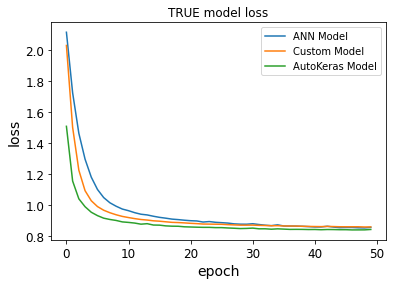

In [139]:
# summarize history for loss
plt.plot(ANN_history.history['val_loss'])
plt.plot(swish_history.history['val_loss'])
plt.plot(Auto_history.history['val_loss'])
plt.title('TRUE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ANN Model', 'Custom Model', 'AutoKeras Model'], loc='upper right')

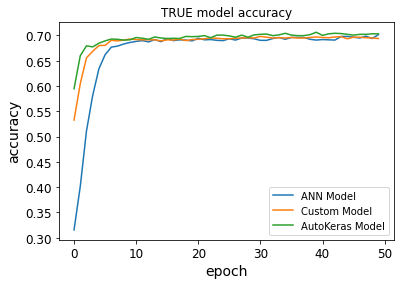

In [141]:
# summarize history for accuracy
plt.plot(ANN_history.history['val_accuracy'])
plt.plot(swish_history.history['val_accuracy'])
plt.plot(Auto_history.history['val_accuracy'])
plt.title('TRUE model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ANN Model', 'Custom Model', 'AutoKeras Model'], loc='lower right')